In [289]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [290]:
df = pd.read_csv(r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\data\cleaned_global_country_data.csv')

In [291]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categrocial_columns = df.select_dtypes(include=['object']).columns


In [292]:
label_encoder = LabelEncoder()

In [293]:
df_encoded = df.copy()

In [294]:
df_encoded['Country'] = label_encoder.fit_transform(df['Country'])
country_mapping = dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))

In [295]:
df_encoded['Continent'] = label_encoder.fit_transform(df['Continent'])
continent_mapping = dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))

In [296]:
country_mapping_df = pd.DataFrame.from_dict(country_mapping, orient='index', columns=['Encoded_Value'])
continent_mapping_df = pd.DataFrame.from_dict(continent_mapping, orient='index', columns = ['Encoded_Value'])

country_mapping_df.to_csv('country_mapping.csv')
continent_mapping_df.to_csv('continent_mapping.csv')

In [297]:
continent_mapping_df

,Encoded_Value
Africa,0
Asia,1
Europe,2
North America,3
Oceania,4
South America,5


In [298]:
df_encoded

,Country,Density_P_Km2,Abbreviation,Agricultural_Land_percent,Land_AreaKm2,Armed_Forces_size,Birth_Rate,Calling_Code,Capital/Major_City,Co2_Emissions,...,Physicians_per_thousand,Population,Population:_Labor_force_participation_percent,Tax_revenue_percent,Total_tax_rate,Unemployment_rate,Urban_population,Latitude,Longitude,Continent
0,0,60,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,0.28,38041754.0,48.90,9.3,71.4,11.120,9797273.0,33.939110,67.709953,1
1,1,105,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,1.20,2854191.0,55.70,18.6,36.6,12.330,1747593.0,41.153332,20.168331,2
2,2,18,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,1.72,43053054.0,41.20,37.2,66.1,11.700,31510100.0,28.033886,1.659626,0
3,3,164,AD,40.0,468.0,27500.0,7.20,376.0,Andorra la Vella,469.0,...,3.33,77142.0,58.95,20.6,38.4,5.235,67873.0,42.506285,1.521801,2
4,4,26,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,0.21,31825295.0,77.50,9.2,49.1,6.890,21061025.0,-11.202692,17.873887,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,32,VE,24.5,912050.0,343000.0,17.88,58.0,Caracas,164175.0,...,1.92,28515829.0,59.70,14.4,73.3,8.800,25162368.0,6.423750,-66.589730,5
191,191,314,VN,39.3,331210.0,522000.0,16.75,84.0,Hanoi,192668.0,...,0.82,96462106.0,77.40,19.1,37.6,2.010,35332140.0,14.058324,108.277199,1
192,192,56,YE,44.6,527968.0,40000.0,30.45,967.0,Sanaa,10609.0,...,0.31,29161922.0,38.00,13.1,26.6,12.910,10869523.0,15.552727,48.516388,1
193,193,25,ZM,32.1,752618.0,16000.0,36.19,260.0,Lusaka,5141.0,...,1.19,17861030.0,74.60,16.2,15.6,11.430,7871713.0,-13.133897,27.849332,0


In [299]:
df_encoded = df_encoded.drop(columns=['Abbreviation','Capital/Major_City','Currency_Code', 'Largest_city','Official_language','Calling_Code'])

In [300]:
scaler = StandardScaler()

In [301]:
df_encoded.dtypes

Country                                            int32
Density_P_Km2                                      int64
Agricultural_Land_percent                        float64
Land_AreaKm2                                     float64
Armed_Forces_size                                float64
Birth_Rate                                       float64
Co2_Emissions                                    float64
CPI                                              float64
CPI_Change_percent                               float64
Fertility_Rate                                   float64
Forested_Area_percent                            float64
Gasoline_Price                                   float64
GDP                                              float64
Gross_primary_education_enrollment_percent       float64
Gross_tertiary_education_enrollment_percent      float64
Infant_mortality                                 float64
Life_expectancy                                  float64
Maternal_mortality_ratio       

In [302]:
numerical_columns = df_encoded.select_dtypes(include=['float64','int64']).columns.tolist()

In [303]:
numerical_columns

['Density_P_Km2',
 'Agricultural_Land_percent',
 'Land_AreaKm2',
 'Armed_Forces_size',
 'Birth_Rate',
 'Co2_Emissions',
 'CPI',
 'CPI_Change_percent',
 'Fertility_Rate',
 'Forested_Area_percent',
 'Gasoline_Price',
 'GDP',
 'Gross_primary_education_enrollment_percent',
 'Gross_tertiary_education_enrollment_percent',
 'Infant_mortality',
 'Life_expectancy',
 'Maternal_mortality_ratio',
 'Minimum_wage',
 'Out_of_pocket_health_expenditure',
 'Physicians_per_thousand',
 'Population',
 'Population:_Labor_force_participation_percent',
 'Tax_revenue_percent',
 'Total_tax_rate',
 'Unemployment_rate',
 'Urban_population',
 'Latitude',
 'Longitude']

In [304]:
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

In [305]:
df_encoded

,Country,Density_P_Km2,Agricultural_Land_percent,Land_AreaKm2,Armed_Forces_size,Birth_Rate,Co2_Emissions,CPI,CPI_Change_percent,Fertility_Rate,...,Physicians_per_thousand,Population,Population:_Labor_force_participation_percent,Tax_revenue_percent,Total_tax_rate,Unemployment_rate,Urban_population,Latitude,Longitude,Continent
0,0,-0.150048,0.885715,-0.018204,0.504787,1.244026,-0.199338,-0.092104,-0.172952,1.394838,...,-0.932121,-0.008486,-1.383920,-1.092322,1.548099,0.907551,-0.162195,0.625867,0.716288,1
1,1,-0.127295,0.183624,-0.344281,-0.371256,-0.853187,-0.204370,-0.173376,-0.211422,-0.844276,...,-0.382210,-0.252243,-0.703354,0.316186,-0.198522,1.157214,-0.270514,0.928011,0.000086,2
2,2,-0.171283,-1.019292,0.886319,0.488047,0.412634,-0.027372,-0.088258,-0.185775,0.255640,...,-0.071390,0.026229,-2.154561,3.133203,1.282091,1.027224,0.129978,0.378547,-0.278742,0
3,3,-0.097464,0.038525,-0.359072,-0.319642,-1.316984,-0.209319,-0.183480,-0.198599,-1.119255,...,0.890954,-0.271480,-0.378084,0.619091,-0.108179,-0.306723,-0.293117,0.984675,-0.280818,2
4,4,-0.167239,0.389571,0.292700,-0.069942,2.078455,-0.167677,0.202504,0.459671,2.219775,...,-0.973962,-0.051550,1.478460,-1.107468,0.428857,0.034759,-0.010627,-1.264746,-0.034479,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,-0.164205,-0.686969,0.117680,0.560586,-0.235466,-0.010132,6.732048,10.624385,-0.333601,...,0.048156,-0.074475,-0.303021,-0.319914,1.643461,0.428857,0.044561,-0.526521,-1.306900,5
191,191,-0.021622,0.005761,-0.186096,1.059986,-0.349896,0.024537,-0.056223,-0.151580,-0.506445,...,-0.609347,0.396213,1.468452,0.391913,-0.148332,-0.972149,0.181408,-0.206773,1.327423,1
192,192,-0.152070,0.253833,-0.083192,-0.284768,1.037444,-0.196981,-0.071872,0.074968,0.860593,...,-0.914189,-0.070000,-2.474828,-0.516803,-0.700424,1.276888,-0.147767,-0.144185,0.427142,1
193,193,-0.167744,-0.331243,0.034298,-0.351726,1.618709,-0.203634,0.072311,0.121987,1.520543,...,-0.388187,-0.148285,1.188219,-0.047300,-1.252517,0.971514,-0.188106,-1.345628,0.115799,0


In [306]:
df_encoded.to_csv('normalized_encoded_data.csv', index=False)

In [307]:
from sklearn.feature_selection import VarianceThreshold

threshold =0.1
variance_selector = VarianceThreshold(threshold = threshold)

df_variance_filtered = variance_selector.fit_transform(df_encoded)
retained_columns = df_encoded.columns[variance_selector.get_support()]
df_variance_filtered = pd.DataFrame(df_variance_filtered, columns = retained_columns)

retained_columns

Index(['Country', 'Density_P_Km2', 'Agricultural_Land_percent', 'Land_AreaKm2',
       'Armed_Forces_size', 'Birth_Rate', 'Co2_Emissions', 'CPI',
       'CPI_Change_percent', 'Fertility_Rate', 'Forested_Area_percent',
       'Gasoline_Price', 'GDP', 'Gross_primary_education_enrollment_percent',
       'Gross_tertiary_education_enrollment_percent', 'Infant_mortality',
       'Life_expectancy', 'Maternal_mortality_ratio', 'Minimum_wage',
       'Out_of_pocket_health_expenditure', 'Physicians_per_thousand',
       'Population', 'Population:_Labor_force_participation_percent',
       'Tax_revenue_percent', 'Total_tax_rate', 'Unemployment_rate',
       'Urban_population', 'Latitude', 'Longitude', 'Continent'],
      dtype='object')

In [308]:
import  numpy as np 
correlation_matrix = df_variance_filtered.corr().abs()

# Select the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop the highly correlated features
df_corr_filtered = df_variance_filtered.drop(columns=highly_correlated_features)

# Display the columns that were removed due to high correlation
print("Highly correlated features removed:", highly_correlated_features)

Highly correlated features removed: ['Fertility_Rate', 'GDP', 'Life_expectancy', 'Urban_population']


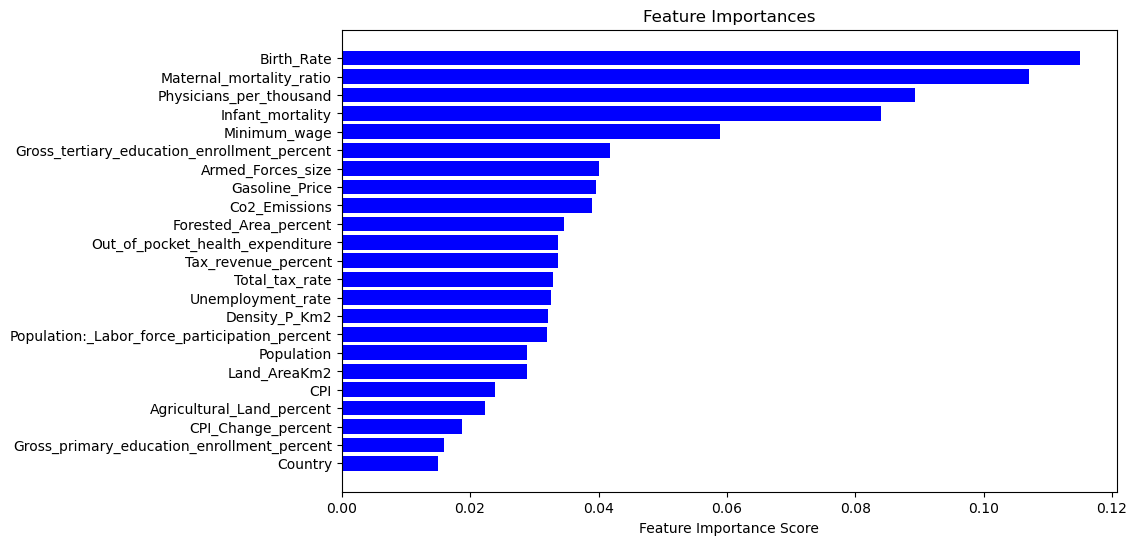

In [310]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Drop 'Continent', 'Longitude', and 'Latitude' from features for this process
features = df_corr_filtered.drop(columns=['Continent', 'Longitude', 'Latitude'])

# Assume the target variable is binary (for clustering, this can be a placeholder)
# Here we're using 'Continent' as a placeholder target variable
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model
rf.fit(features, df_corr_filtered['Continent'])  # Replace 'Continent' with your actual target variable if needed

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='b')
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.savefig(r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\feature_importances.png')  # Save the figure
plt.show()

# Select the top N features (e.g., top 20)
top_features = feature_importance_df['Feature']
df_rf_filtered = df_corr_filtered[top_features]


In [311]:
df_encoded

,Country,Density_P_Km2,Agricultural_Land_percent,Land_AreaKm2,Armed_Forces_size,Birth_Rate,Co2_Emissions,CPI,CPI_Change_percent,Fertility_Rate,...,Physicians_per_thousand,Population,Population:_Labor_force_participation_percent,Tax_revenue_percent,Total_tax_rate,Unemployment_rate,Urban_population,Latitude,Longitude,Continent
0,0,-0.150048,0.885715,-0.018204,0.504787,1.244026,-0.199338,-0.092104,-0.172952,1.394838,...,-0.932121,-0.008486,-1.383920,-1.092322,1.548099,0.907551,-0.162195,0.625867,0.716288,1
1,1,-0.127295,0.183624,-0.344281,-0.371256,-0.853187,-0.204370,-0.173376,-0.211422,-0.844276,...,-0.382210,-0.252243,-0.703354,0.316186,-0.198522,1.157214,-0.270514,0.928011,0.000086,2
2,2,-0.171283,-1.019292,0.886319,0.488047,0.412634,-0.027372,-0.088258,-0.185775,0.255640,...,-0.071390,0.026229,-2.154561,3.133203,1.282091,1.027224,0.129978,0.378547,-0.278742,0
3,3,-0.097464,0.038525,-0.359072,-0.319642,-1.316984,-0.209319,-0.183480,-0.198599,-1.119255,...,0.890954,-0.271480,-0.378084,0.619091,-0.108179,-0.306723,-0.293117,0.984675,-0.280818,2
4,4,-0.167239,0.389571,0.292700,-0.069942,2.078455,-0.167677,0.202504,0.459671,2.219775,...,-0.973962,-0.051550,1.478460,-1.107468,0.428857,0.034759,-0.010627,-1.264746,-0.034479,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,-0.164205,-0.686969,0.117680,0.560586,-0.235466,-0.010132,6.732048,10.624385,-0.333601,...,0.048156,-0.074475,-0.303021,-0.319914,1.643461,0.428857,0.044561,-0.526521,-1.306900,5
191,191,-0.021622,0.005761,-0.186096,1.059986,-0.349896,0.024537,-0.056223,-0.151580,-0.506445,...,-0.609347,0.396213,1.468452,0.391913,-0.148332,-0.972149,0.181408,-0.206773,1.327423,1
192,192,-0.152070,0.253833,-0.083192,-0.284768,1.037444,-0.196981,-0.071872,0.074968,0.860593,...,-0.914189,-0.070000,-2.474828,-0.516803,-0.700424,1.276888,-0.147767,-0.144185,0.427142,1
193,193,-0.167744,-0.331243,0.034298,-0.351726,1.618709,-0.203634,0.072311,0.121987,1.520543,...,-0.388187,-0.148285,1.188219,-0.047300,-1.252517,0.971514,-0.188106,-1.345628,0.115799,0


In [319]:
# Drop the specified columns from the dataset
columns_to_drop = ['Latitude', 'Longitude', 'Continent',
    'Population', 'CPI_Change_percent', 'Fertility_Rate', 'Forested_Area_percent',
    'Gasoline_Price', 'GDP', 'Co2_Emissions',
    'Density_P_Km2', 'Agricultural_Land_percent', 'Land_AreaKm2', 'Armed_Forces_size', 'Country'  ]

# Create a new DataFrame without the specified columns
df_selected = df_encoded.drop(columns=columns_to_drop)

df_selected


,Birth_Rate,CPI,Gross_primary_education_enrollment_percent,Gross_tertiary_education_enrollment_percent,Infant_mortality,Life_expectancy,Maternal_mortality_ratio,Minimum_wage,Out_of_pocket_health_expenditure,Physicians_per_thousand,Population:_Labor_force_participation_percent,Tax_revenue_percent,Total_tax_rate,Unemployment_rate,Urban_population
0,1.244026,-0.092104,0.119254,-0.972868,1.382443,-1.060487,2.136061,-0.590386,2.429579,-0.932121,-1.383920,-1.092322,1.548099,0.907551,-0.162195
1,-0.853187,-0.173376,0.352110,0.591666,-0.686855,0.820078,-0.606742,-0.332023,1.291178,-0.382210,-0.703354,0.316186,-0.198522,1.157214,-0.270514
2,0.412634,-0.088258,0.577205,0.467332,-0.052133,0.578291,-0.179693,-0.395678,-0.233749,-0.071390,-2.154561,3.133203,1.282091,1.027224,0.129978
3,-1.316984,-0.183480,0.305539,1.035469,-0.950032,1.155893,-0.646366,1.731142,0.205727,0.890954,-0.378084,0.619091,-0.108179,-0.306723,-0.293117
4,2.078455,0.202504,0.856632,-0.986683,1.573375,-1.557494,0.388239,-0.485543,0.046880,-0.973962,1.478460,-1.107468,0.428857,0.034759,-0.010627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-0.235466,6.732048,-0.408553,1.430920,0.014952,-0.039609,-0.122459,-0.747651,0.703446,0.048156,-0.303021,-0.319914,1.643461,0.428857,0.044561
191,-0.349896,-0.056223,0.631538,-0.323569,-0.237905,0.390235,-0.483470,-0.478054,0.581664,-0.609347,1.468452,0.391913,-0.148332,-0.972149,0.181408
192,1.037444,-0.071872,-0.687981,-0.955599,1.124426,-0.845566,0.049241,-0.478054,2.567246,-0.914189,-2.474828,-0.516803,-0.700424,1.276888,-0.147767
193,1.618709,0.072311,-0.292125,-1.166276,0.995417,-1.194813,0.264967,-0.661530,-0.265518,-0.388187,1.188219,-0.047300,-1.252517,0.971514,-0.188106


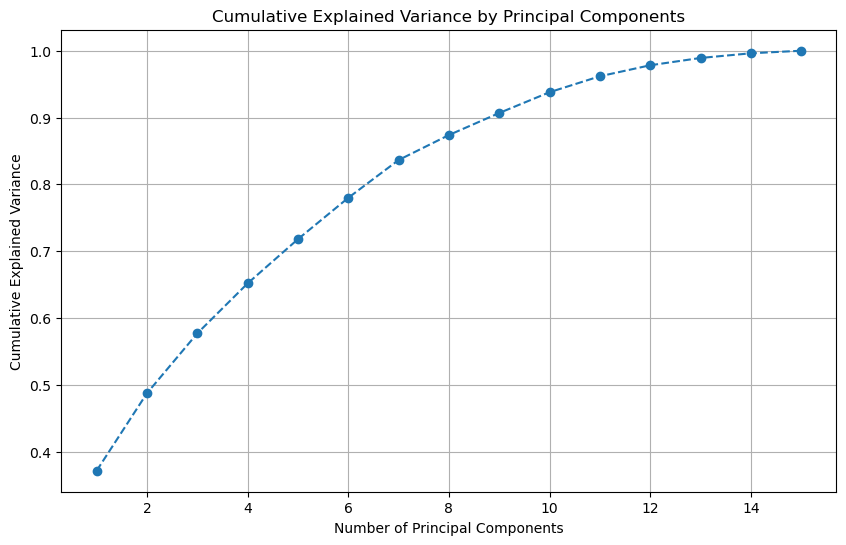

In [320]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA on the selected dataset
pca = PCA()
pca_result = pca.fit_transform(df_selected)

# Convert the PCA result into a DataFrame
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.savefig(r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\pca_cumulative_explained_variance.png')  # Save the figure
plt.show()



In [321]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components that explain 95% of the variance: {n_components_95}")

Number of components that explain 95% of the variance: 11


In [322]:
df_selected

,Birth_Rate,CPI,Gross_primary_education_enrollment_percent,Gross_tertiary_education_enrollment_percent,Infant_mortality,Life_expectancy,Maternal_mortality_ratio,Minimum_wage,Out_of_pocket_health_expenditure,Physicians_per_thousand,Population:_Labor_force_participation_percent,Tax_revenue_percent,Total_tax_rate,Unemployment_rate,Urban_population
0,1.244026,-0.092104,0.119254,-0.972868,1.382443,-1.060487,2.136061,-0.590386,2.429579,-0.932121,-1.383920,-1.092322,1.548099,0.907551,-0.162195
1,-0.853187,-0.173376,0.352110,0.591666,-0.686855,0.820078,-0.606742,-0.332023,1.291178,-0.382210,-0.703354,0.316186,-0.198522,1.157214,-0.270514
2,0.412634,-0.088258,0.577205,0.467332,-0.052133,0.578291,-0.179693,-0.395678,-0.233749,-0.071390,-2.154561,3.133203,1.282091,1.027224,0.129978
3,-1.316984,-0.183480,0.305539,1.035469,-0.950032,1.155893,-0.646366,1.731142,0.205727,0.890954,-0.378084,0.619091,-0.108179,-0.306723,-0.293117
4,2.078455,0.202504,0.856632,-0.986683,1.573375,-1.557494,0.388239,-0.485543,0.046880,-0.973962,1.478460,-1.107468,0.428857,0.034759,-0.010627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-0.235466,6.732048,-0.408553,1.430920,0.014952,-0.039609,-0.122459,-0.747651,0.703446,0.048156,-0.303021,-0.319914,1.643461,0.428857,0.044561
191,-0.349896,-0.056223,0.631538,-0.323569,-0.237905,0.390235,-0.483470,-0.478054,0.581664,-0.609347,1.468452,0.391913,-0.148332,-0.972149,0.181408
192,1.037444,-0.071872,-0.687981,-0.955599,1.124426,-0.845566,0.049241,-0.478054,2.567246,-0.914189,-2.474828,-0.516803,-0.700424,1.276888,-0.147767
193,1.618709,0.072311,-0.292125,-1.166276,0.995417,-1.194813,0.264967,-0.661530,-0.265518,-0.388187,1.188219,-0.047300,-1.252517,0.971514,-0.188106


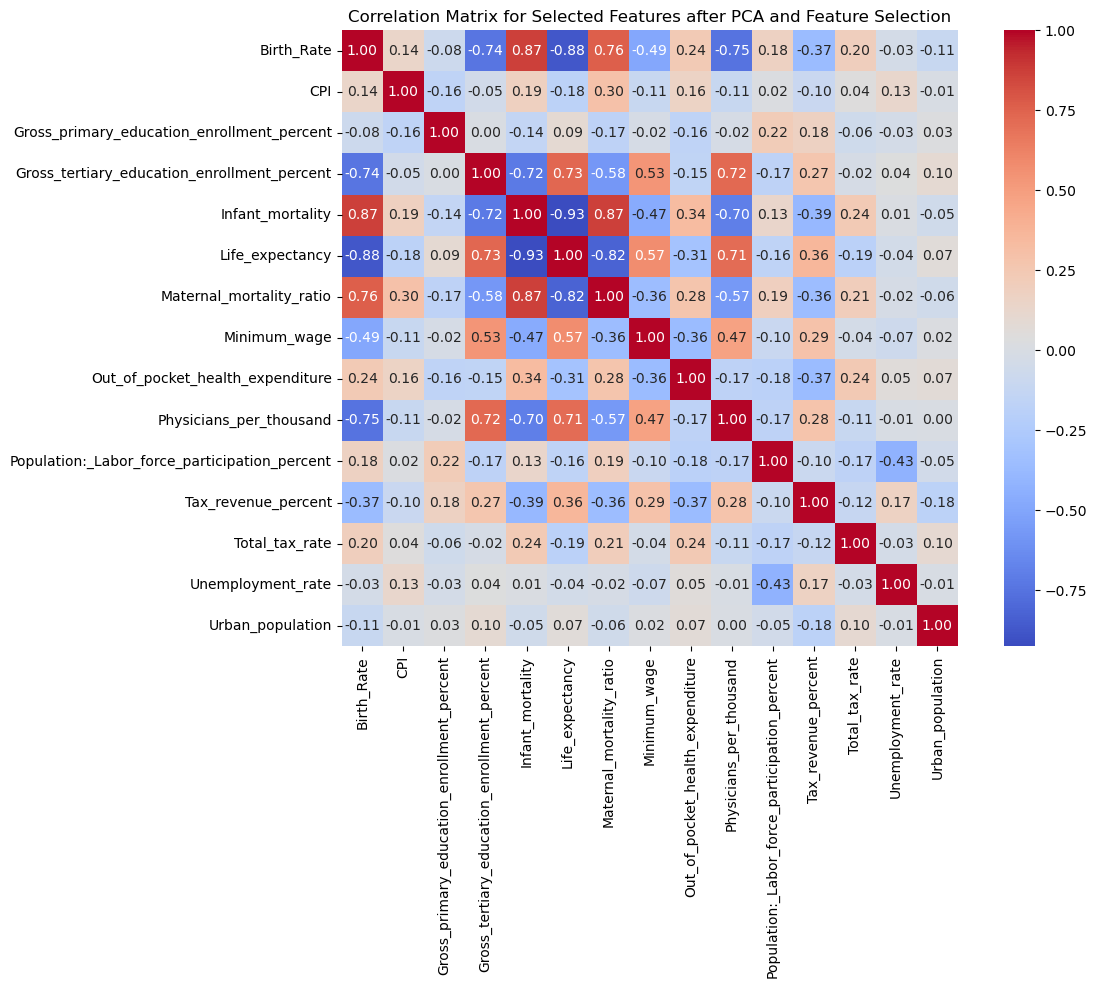

Highly correlated feature pairs (correlation > 0.8):
[('Birth_Rate', 'Infant_mortality'), ('Birth_Rate', 'Life_expectancy'), ('Infant_mortality', 'Birth_Rate'), ('Infant_mortality', 'Life_expectancy'), ('Infant_mortality', 'Maternal_mortality_ratio'), ('Life_expectancy', 'Birth_Rate'), ('Life_expectancy', 'Infant_mortality'), ('Life_expectancy', 'Maternal_mortality_ratio'), ('Maternal_mortality_ratio', 'Infant_mortality'), ('Maternal_mortality_ratio', 'Life_expectancy')]


In [323]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Matrix for Selected Features after PCA and Feature Selection")
plt.savefig(r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\correlation_matrix_PCA.png')  # Save the figure
plt.show()

# Optionally: Print highly correlated feature pairs
high_corr_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns 
                   if i != j and abs(corr_matrix.loc[i, j]) > 0.8]
print("Highly correlated feature pairs (correlation > 0.8):")
print(high_corr_pairs)



In [325]:
# Dropping the selected features from the dataframe
#df_selected = df_selected.drop(columns=['CPI', 'GDP', 'Minimum_wage', 'Population:_Labor_force_participation_percent', 'Tax_revenue_percent'])

# Display the new shape of the dataframe
print("Shape of the dataframe after dropping selected features:", df_selected.shape)

# Display the remaining columns
print("Remaining columns after reduction:", df_selected.columns.tolist())


Shape of the dataframe after dropping selected features: (195, 15)
Remaining columns after reduction: ['Birth_Rate', 'CPI', 'Gross_primary_education_enrollment_percent', 'Gross_tertiary_education_enrollment_percent', 'Infant_mortality', 'Life_expectancy', 'Maternal_mortality_ratio', 'Minimum_wage', 'Out_of_pocket_health_expenditure', 'Physicians_per_thousand', 'Population:_Labor_force_participation_percent', 'Tax_revenue_percent', 'Total_tax_rate', 'Unemployment_rate', 'Urban_population']


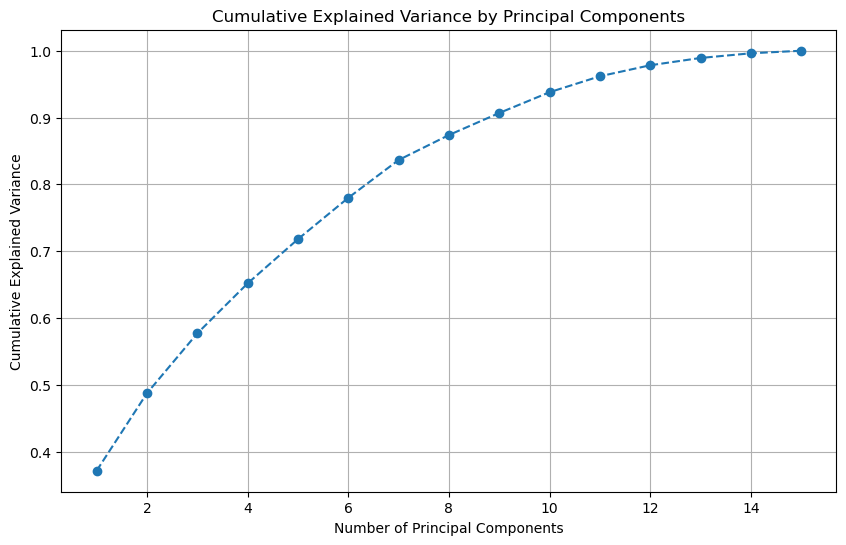

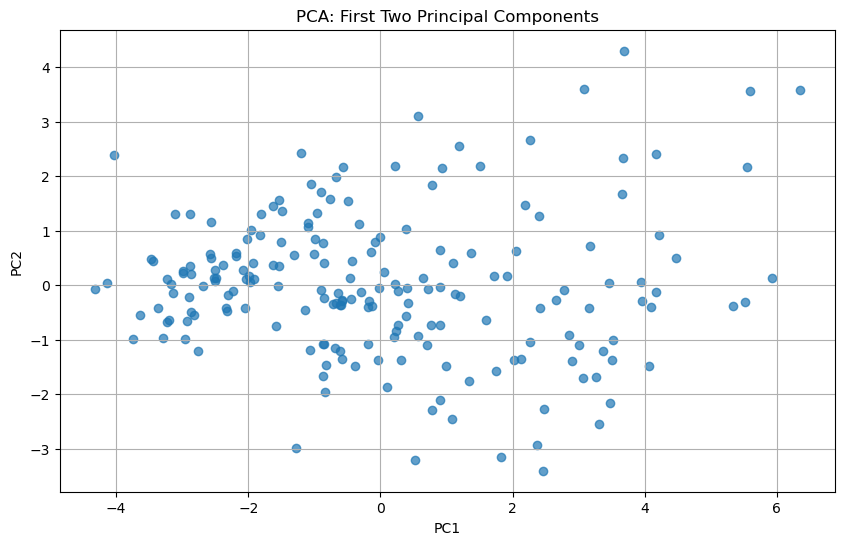

In [326]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Apply PCA on the selected dataset
pca = PCA()
pca_result = pca.fit_transform(df_selected)

# Convert the PCA result into a DataFrame
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Plot the cumulative explained variance to determine the number of components to keep
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.savefig(r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\Clustering\cumulative_variance_pca.png')
plt.show()

# Decide on the number of components to keep based on the plot (e.g., 95% explained variance)
n_components = 12  # Adjust based on the plot
pca = PCA(n_components=n_components)
pca_reduced = pca.fit_transform(df_selected)

# Optionally, visualize the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_reduced[:, 0], pca_reduced[:, 1], alpha=0.7)
plt.title('PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.savefig(r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\Clustering\PCA.png')
plt.show()


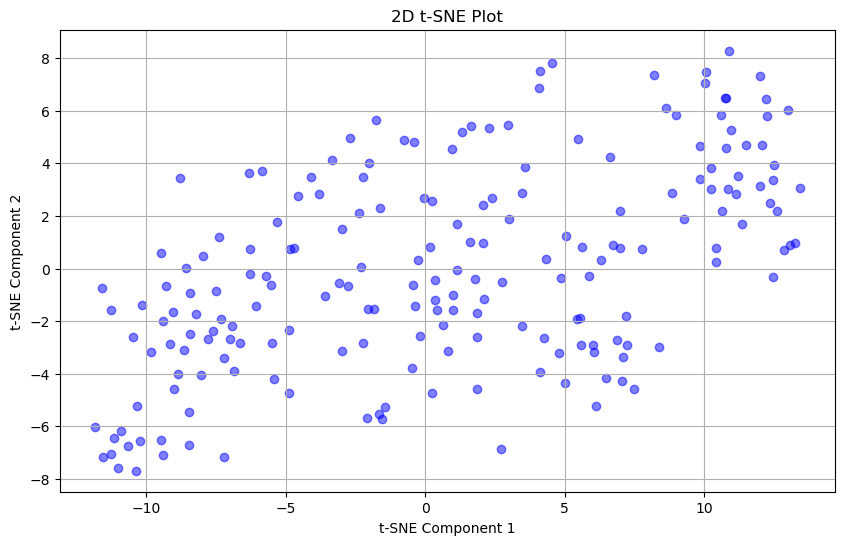

In [327]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_selected)

# Convert the t-SNE result into a DataFrame
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

# 2D scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c='blue', alpha=0.5)
plt.title('2D t-SNE Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.savefig(r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\Clustering\t-SNE.png')
plt.show()


c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



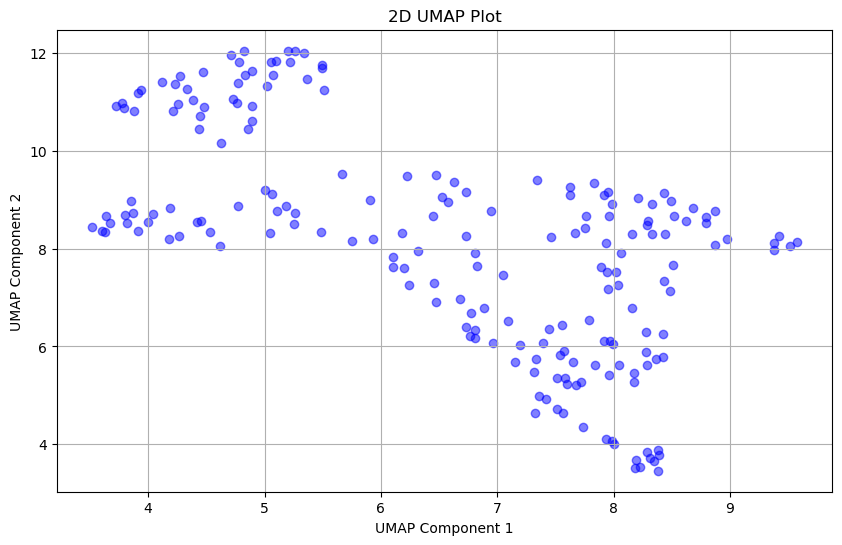

In [328]:
import umap

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(df_selected)

# Convert the UMAP result into a DataFrame
umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])

# 2D scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c='blue', alpha=0.5)
plt.title('2D UMAP Plot')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)
plt.savefig(r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\Clustering\umap.png')
plt.show()


c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, 

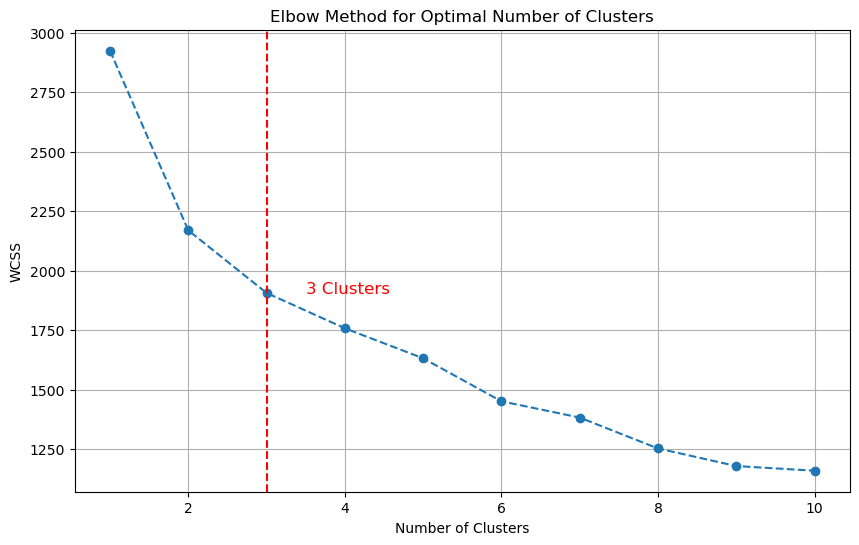

In [329]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(df_selected)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')

# Annotate the elbow point (you may adjust this manually based on the plot)
optimal_clusters = 3  # Replace this with the actual number where the elbow is observed
plt.axvline(x=optimal_clusters, color='red', linestyle='--')
plt.text(optimal_clusters + 0.5, wcss[optimal_clusters - 1], f'{optimal_clusters} Clusters', color='red', fontsize=12)

plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.savefig(r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\Clustering\elbow_method.png')
plt.show()

In [330]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import hdbscan
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score

In [348]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_selected)

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [349]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(df_selected)

In [350]:
dbscan = DBSCAN(eps=0.5, min_samples = 3)
dbscan_labels = dbscan.fit_predict(df_selected)

In [351]:
gmm = GaussianMixture(n_components=3, random_state =42)
gmm_labels = gmm.fit_predict(df_selected)

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [352]:
hdbscan_clustering = hdbscan.HDBSCAN(min_cluster_size =3)
hdbscan_labels = hdbscan_clustering.fit_predict(df_selected)

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



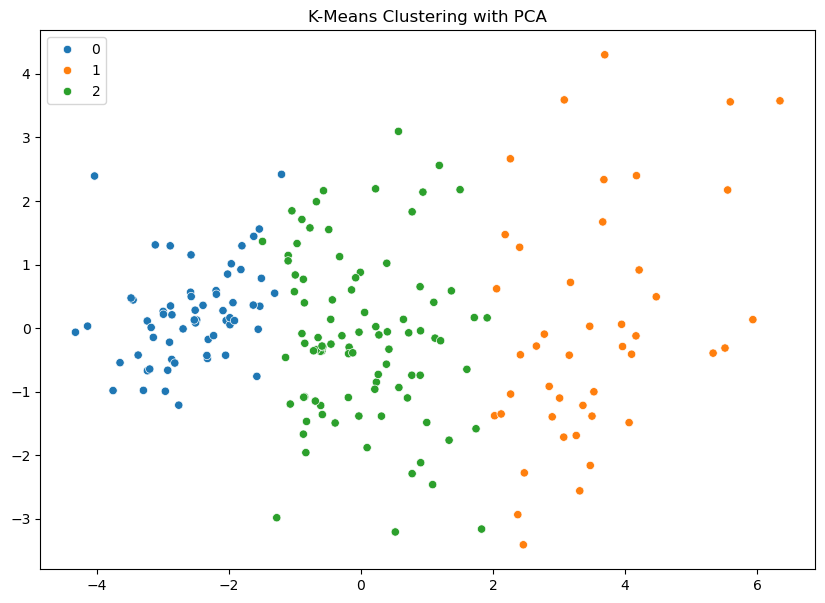

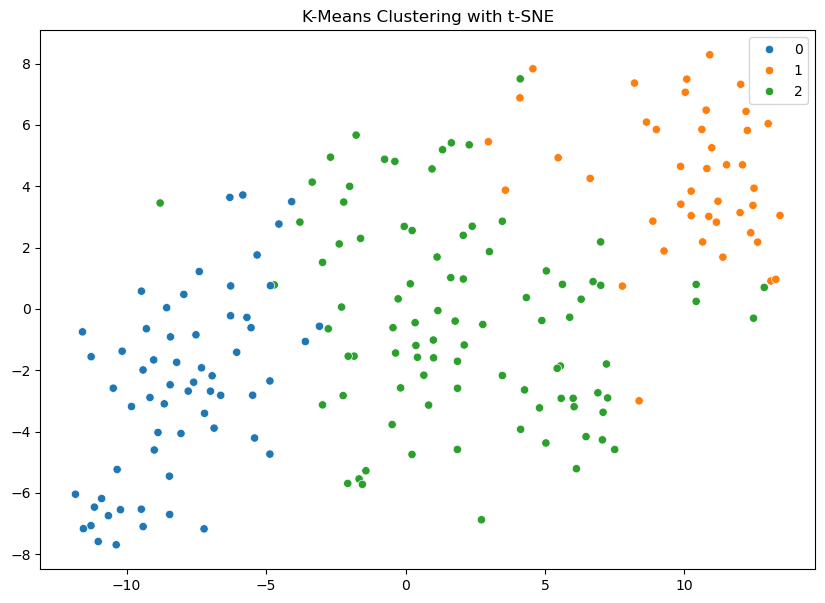

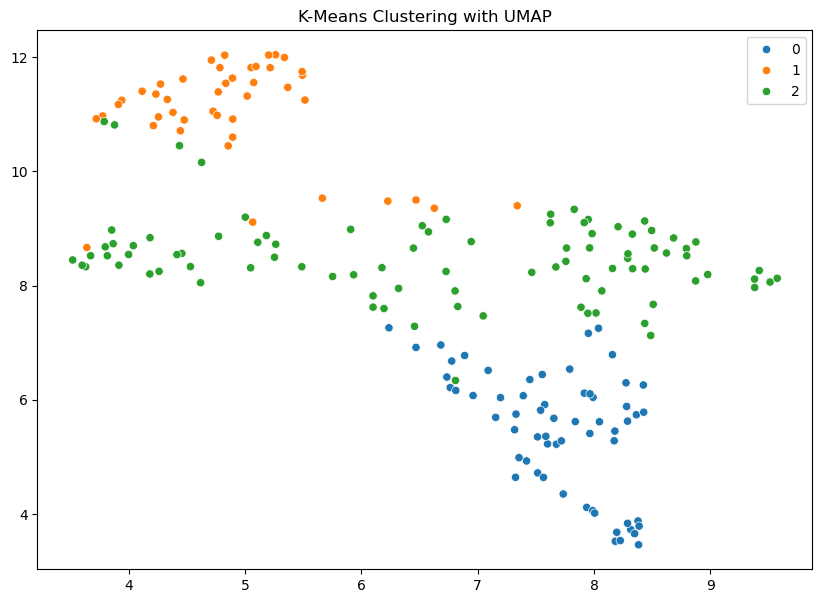

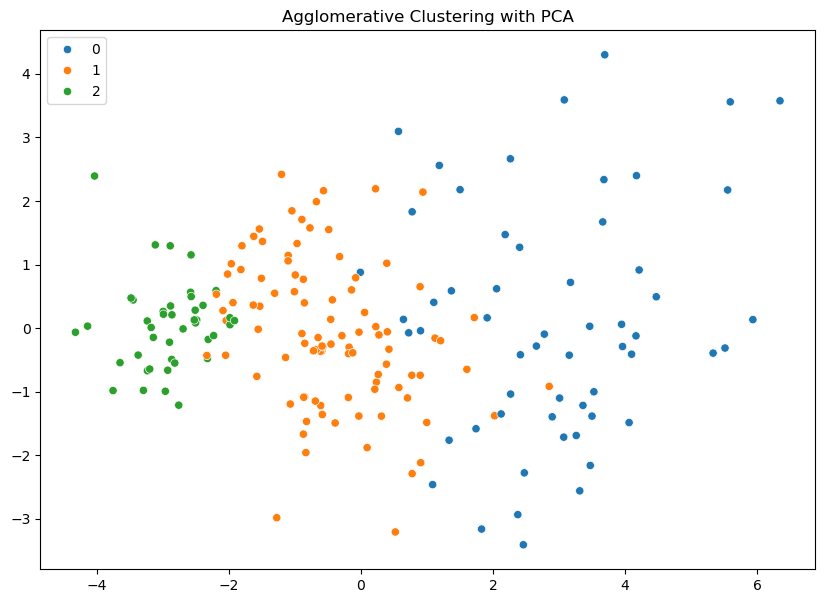

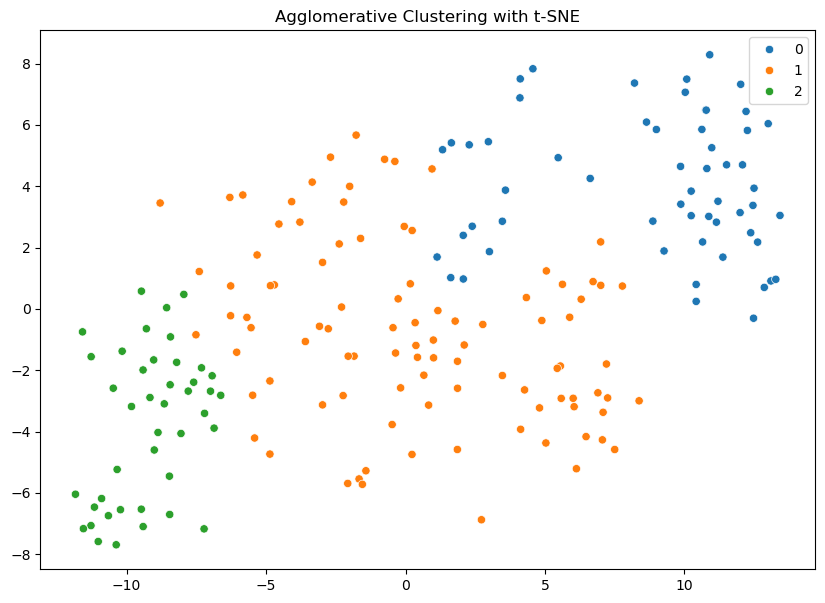

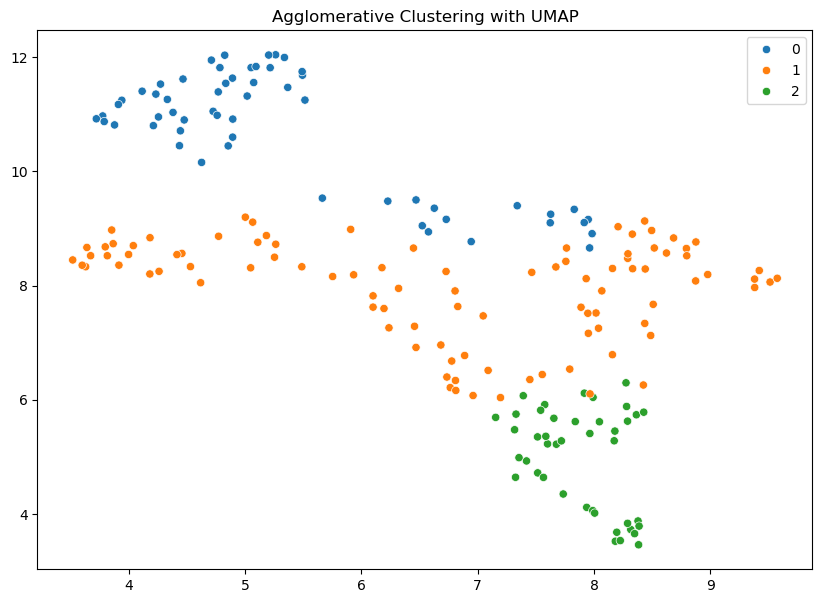

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_selected)

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_selected)

# UMAP Visualization
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(df_selected)

# Function to plot clusters
def plot_clusters(embedding, labels, title):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=labels, palette='tab10')
    plt.title(title)
    plt.savefig(fr'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\Clustering\{title}.png')
    plt.show()

# Visualize K-Means Clustering
plot_clusters(pca_result, kmeans_labels, "K-Means Clustering with PCA")
plot_clusters(tsne_result, kmeans_labels, "K-Means Clustering with t-SNE")
plot_clusters(umap_result, kmeans_labels, "K-Means Clustering with UMAP")

# Visualize Agglomerative Clustering
plot_clusters(pca_result, agg_labels, "Agglomerative Clustering with PCA")
plot_clusters(tsne_result, agg_labels, "Agglomerative Clustering with t-SNE")
plot_clusters(umap_result, agg_labels, "Agglomerative Clustering with UMAP")

# Visualize DBSCAN Clustering
# plot_clusters(pca_result, dbscan_labels, "DBSCAN Clustering with PCA")
# plot_clusters(tsne_result, dbscan_labels, "DBSCAN Clustering with t-SNE")
# plot_clusters(umap_result, dbscan_labels, "DBSCAN Clustering with UMAP")

# # Visualize GMM Clustering
# plot_clusters(pca_result, gmm_labels, "GMM Clustering with PCA")
# plot_clusters(tsne_result, gmm_labels, "GMM Clustering with t-SNE")
# plot_clusters(umap_result, gmm_labels, "GMM Clustering with UMAP")

# # Visualize HDBSCAN Clustering
# plot_clusters(pca_result, hdbscan_labels, "HDBSCAN Clustering with PCA")
# plot_clusters(tsne_result, hdbscan_labels, "HDBSCAN Clustering with t-SNE")
# plot_clusters(umap_result, hdbscan_labels, "HDBSCAN Clustering with UMAP")


In [354]:
# Calculate Evaluation Metrics
def evaluate_clustering(labels, data):
    silhouette = silhouette_score(data, labels)
    db_score = davies_bouldin_score(data, labels)
    ch_score = calinski_harabasz_score(data, labels)
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Index: {db_score:.4f}")
    print(f"Calinski-Harabasz Index: {ch_score:.4f}")
    return silhouette, db_score, ch_score

print("K-Means Clustering Evaluation Metrics:")
evaluate_clustering(kmeans_labels, df_selected)

print("\nAgglomerative Clustering Evaluation Metrics:")
evaluate_clustering(agg_labels, df_selected)

# print("\nDBSCAN Clustering Evaluation Metrics:")
# evaluate_clustering(dbscan_labels, df_selected)

# print("\nGaussian Mixture Model Clustering Evaluation Metrics:")
# evaluate_clustering(gmm_labels, df_selected)

# print("\nHDBSCAN Clustering Evaluation Metrics:")
# evaluate_clustering(hdbscan_labels, df_selected)


K-Means Clustering Evaluation Metrics:
Silhouette Score: 0.1749
Davies-Bouldin Index: 1.7387
Calinski-Harabasz Index: 51.2840

Agglomerative Clustering Evaluation Metrics:
Silhouette Score: 0.1455
Davies-Bouldin Index: 1.7507
Calinski-Harabasz Index: 45.5832


(0.14550180625236853, 1.7507294568166574, 45.58317507699358)

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, 

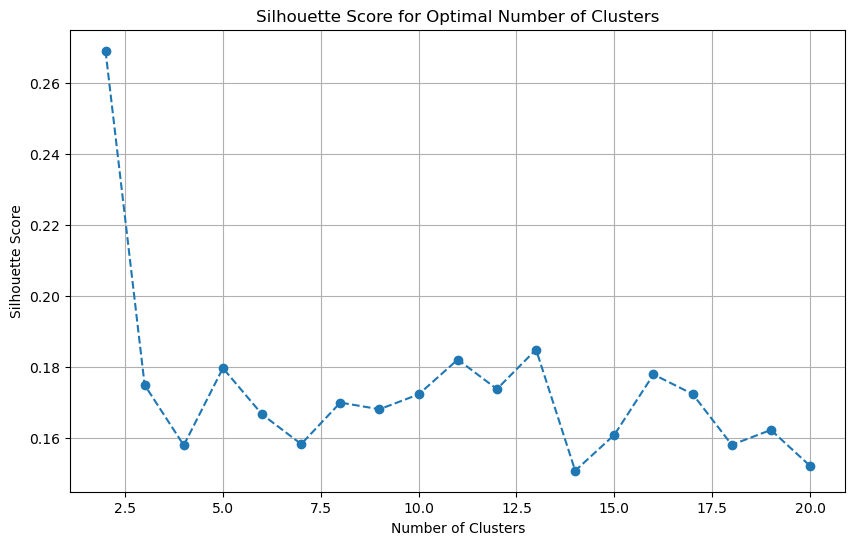

In [355]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 21):  # Typically starts from 2 to avoid the single-cluster case
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(df_selected)
    silhouette_avg = silhouette_score(df_selected, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, 

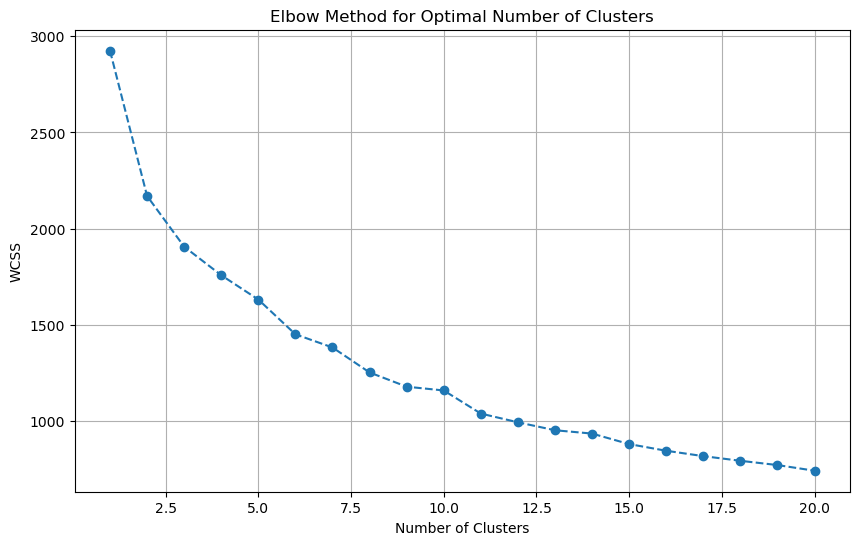

In [356]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate WCSS for a refined range of clusters (e.g., 1 to 20)
wcss = []
for i in range(1, 21):  # Adjust the range if needed
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_selected)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [357]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_selected)

# Define the range for the number of clusters
cluster_range = range(2, 21)  # Typically starts from 2 to avoid the single-cluster case

# Initialize variables to store the best results
best_score = -1
best_params = None

# Grid search over the number of clusters and initialization methods
for n_clusters in cluster_range:
    for init_method in ['k-means++', 'random']:
        kmeans = KMeans(n_clusters=n_clusters, init=init_method, max_iter=300, n_init=10, random_state=42)
        cluster_labels = kmeans.fit_predict(df_selected_scaled)
        
        # Compute the silhouette score
        silhouette_avg = silhouette_score(df_selected_scaled, cluster_labels)
        
        # If the silhouette score is the best we've seen, remember it
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_params = {'n_clusters': n_clusters, 'init': init_method}

print("Best parameters found: ", best_params)
print("Best silhouette score: ", best_score)


c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, 

Best parameters found:  {'n_clusters': 2, 'init': 'k-means++'}
Best silhouette score:  0.26899222153585195


c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [358]:
import pandas as pd

# Assuming 'df_encoded' is the original DataFrame with Country, Continent, etc., and df_selected is the one after PCA
# Add the cluster labels to the original DataFrame
data_with_labels = df_encoded.copy()  # Make a copy of the original data
data_with_labels['Cluster'] = kmeans_labels  # Add the cluster labels to the DataFrame

# Compute the mean values for each cluster (cluster profiling)
cluster_profile = data_with_labels.groupby('Cluster').mean()

# Save the cluster profile to an Excel file for further analysis if needed
cluster_profile.to_excel('cluster_profile.xlsx')

# Optional: Save the entire dataset with cluster labels and original information
data_with_labels.to_excel('data_with_clusters.xlsx', index=False)

# View the first few rows of the data with clusters
print(data_with_labels.head())


   Country  Density_P_Km2  Agricultural_Land_percent  Land_AreaKm2  \
0        0      -0.150048                   0.885715     -0.018204   
1        1      -0.127295                   0.183624     -0.344281   
2        2      -0.171283                  -1.019292      0.886319   
3        3      -0.097464                   0.038525     -0.359072   
4        4      -0.167239                   0.389571      0.292700   

   Armed_Forces_size  Birth_Rate  Co2_Emissions       CPI  CPI_Change_percent  \
0           0.504787    1.244026      -0.199338 -0.092104           -0.172952   
1          -0.371256   -0.853187      -0.204370 -0.173376           -0.211422   
2           0.488047    0.412634      -0.027372 -0.088258           -0.185775   
3          -0.319642   -1.316984      -0.209319 -0.183480           -0.198599   
4          -0.069942    2.078455      -0.167677  0.202504            0.459671   

   Fertility_Rate  ...  Population  \
0        1.394838  ...   -0.008486   
1       -0.84427

   Country  Density_P_Km2  Agricultural_Land_percent  Land_AreaKm2  \
0        0      -0.150048                   0.885715     -0.018204   
1        1      -0.127295                   0.183624     -0.344281   
2        2      -0.171283                  -1.019292      0.886319   
3        3      -0.097464                   0.038525     -0.359072   
4        4      -0.167239                   0.389571      0.292700   

   Armed_Forces_size  Birth_Rate  Co2_Emissions       CPI  CPI_Change_percent  \
0           0.504787    1.244026      -0.199338 -0.092104           -0.172952   
1          -0.371256   -0.853187      -0.204370 -0.173376           -0.211422   
2           0.488047    0.412634      -0.027372 -0.088258           -0.185775   
3          -0.319642   -1.316984      -0.209319 -0.183480           -0.198599   
4          -0.069942    2.078455      -0.167677  0.202504            0.459671   

   Fertility_Rate  ...  Population  \
0        1.394838  ...   -0.008486   
1       -0.84427

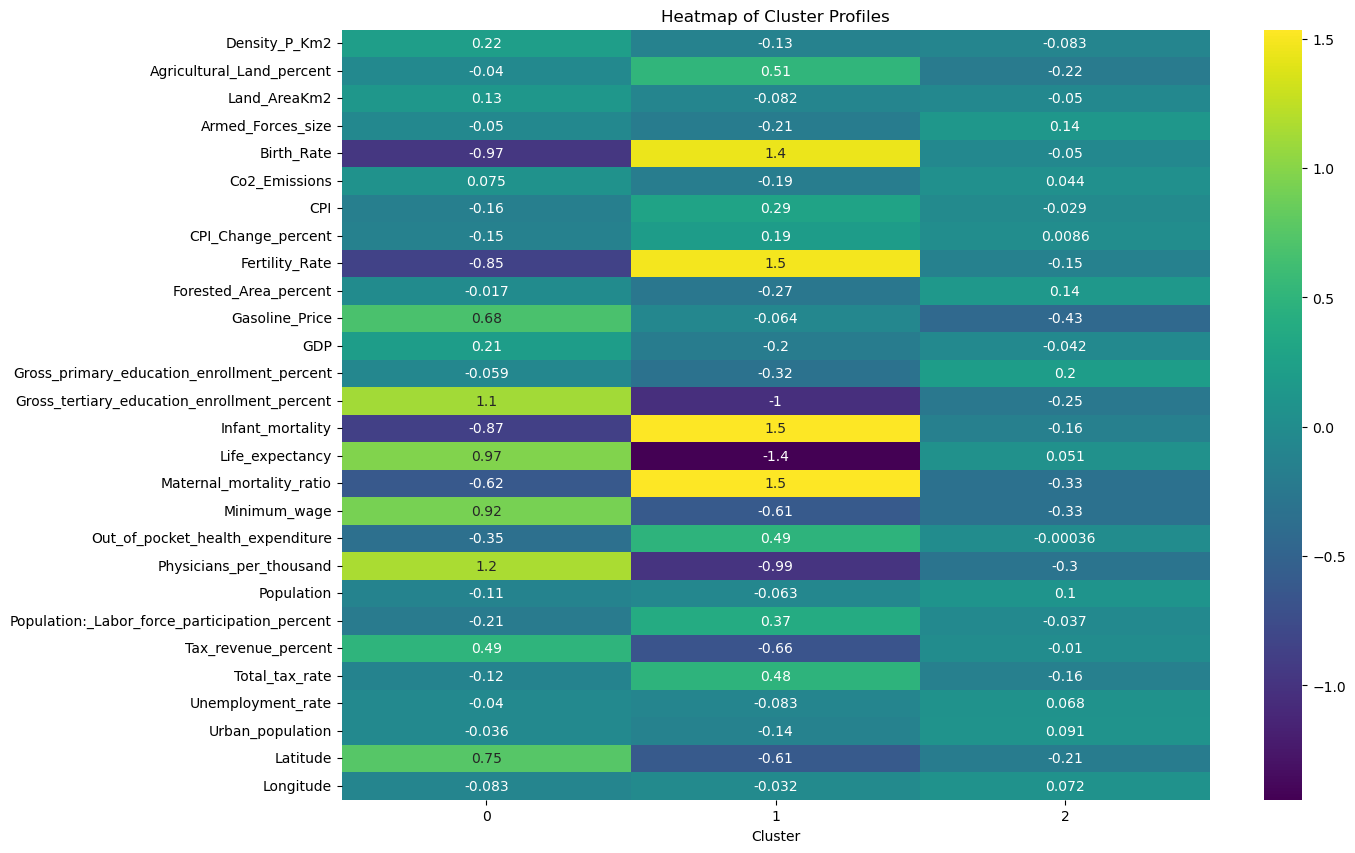

In [359]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_encoded' is the full data with all features, including country names and continent, and 'kmeans_labels' are the cluster labels
data_with_labels = df_encoded.copy()
data_with_labels['Cluster'] = kmeans_labels

# View the first few rows to ensure data is correctly prepared
print(data_with_labels.head())

data_with_labels= data_with_labels.drop(columns=['Country', 'Continent'])

# Compute the cluster profile (mean values per cluster)
cluster_profile = data_with_labels.groupby('Cluster').mean()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(cluster_profile.T, cmap='viridis', annot=True)
plt.title('Heatmap of Cluster Profiles')
plt.savefig(fr'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\Clustering\cluster_profile')

plt.show()



C:\Windows\Temp\ipykernel_16008\431533665.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




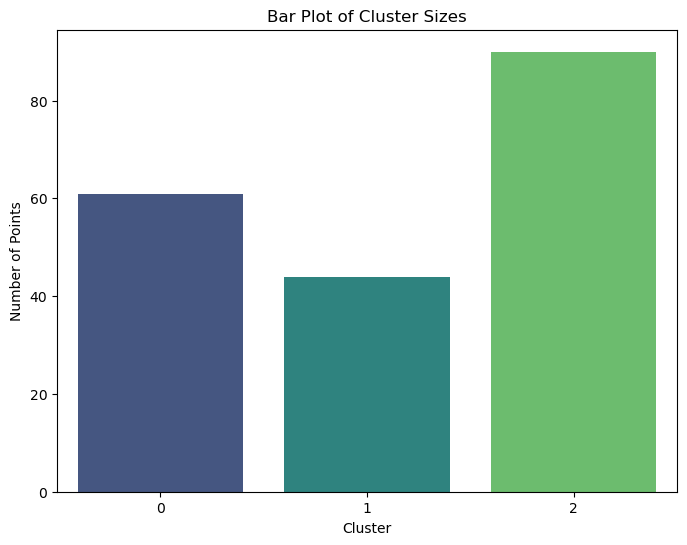

In [360]:
# Count the number of points in each cluster
cluster_sizes = data_with_labels['Cluster'].value_counts()

# Plot the bar chart of cluster sizes
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='viridis')
plt.title('Bar Plot of Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.savefig(fr'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\Clustering\cluster_sizes.png')
plt.show()


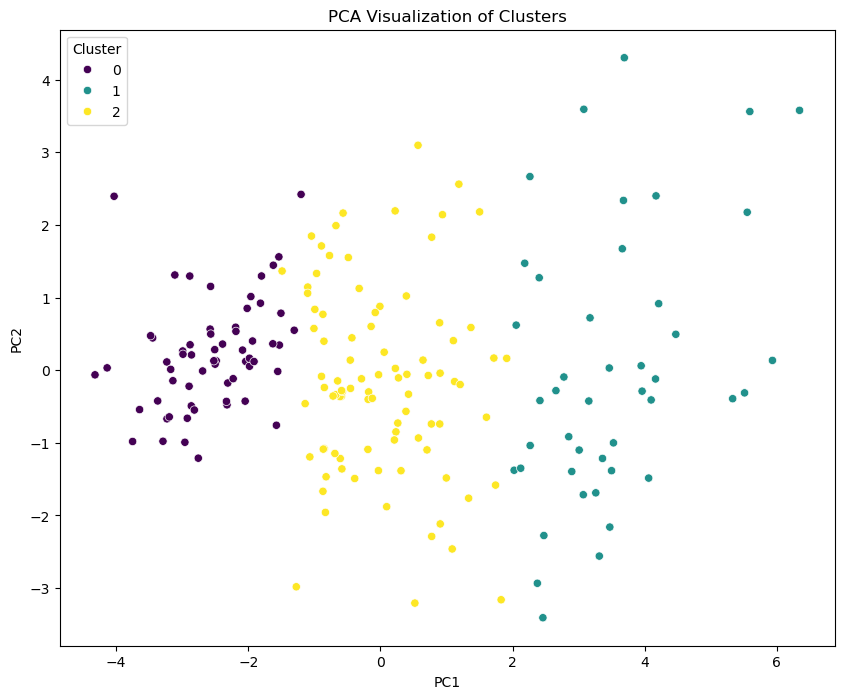

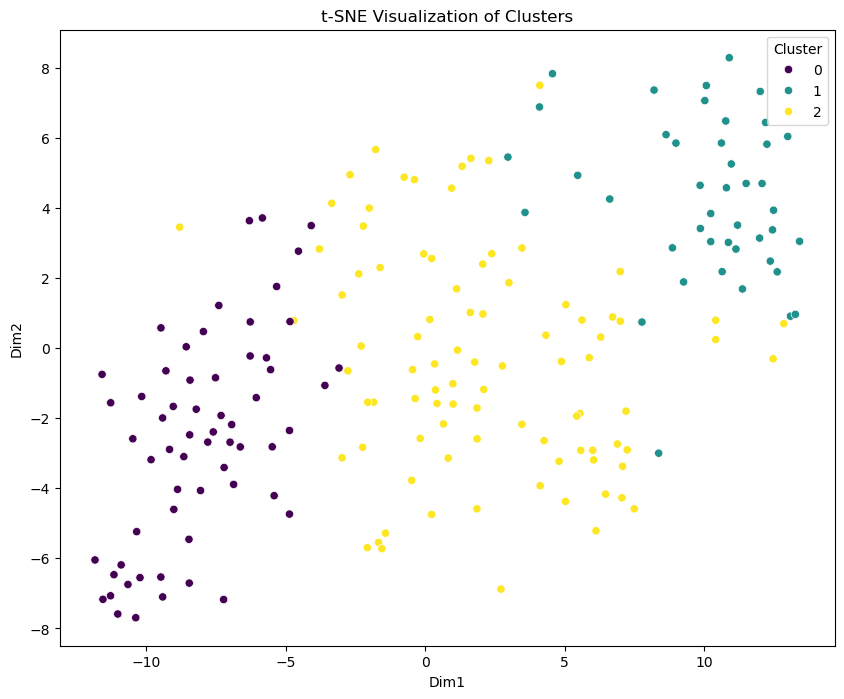

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



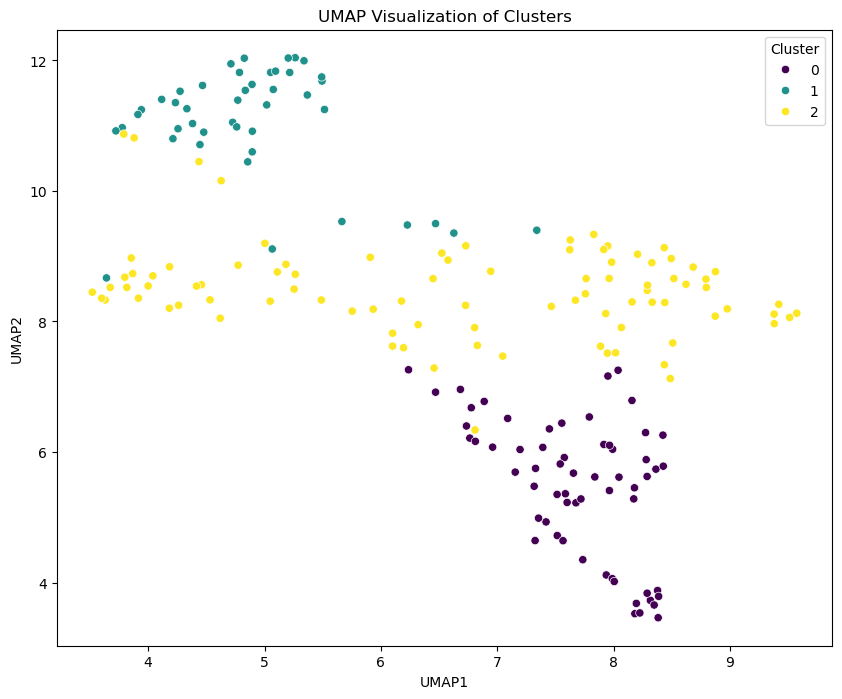

In [361]:
from sklearn.decomposition import PCA

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_selected)

# Create a DataFrame for PCA result
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans_labels

# Plot the PCA result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df)
plt.title('PCA Visualization of Clusters')
plt.savefig(fr'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\Clustering\pca_kmeans.png')
plt.show()

from sklearn.manifold import TSNE

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_selected)

# Create a DataFrame for t-SNE result
tsne_df = pd.DataFrame(tsne_result, columns=['Dim1', 'Dim2'])
tsne_df['Cluster'] = kmeans_labels

# Plot the t-SNE result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dim1', y='Dim2', hue='Cluster', palette='viridis', data=tsne_df)
plt.title('t-SNE Visualization of Clusters')
plt.savefig(fr'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\Clustering\t-SNE_kmeans.png')
plt.show()


import umap

# Apply UMAP for 2D visualization
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(df_selected)

# Create a DataFrame for UMAP result
umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = kmeans_labels

# Plot the UMAP result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', palette='viridis', data=umap_df)
plt.title('UMAP Visualization of Clusters')
plt.savefig(fr'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\Clustering\umap_kmeans.png')
plt.show()



C:\Windows\Temp\ipykernel_16008\1282861973.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




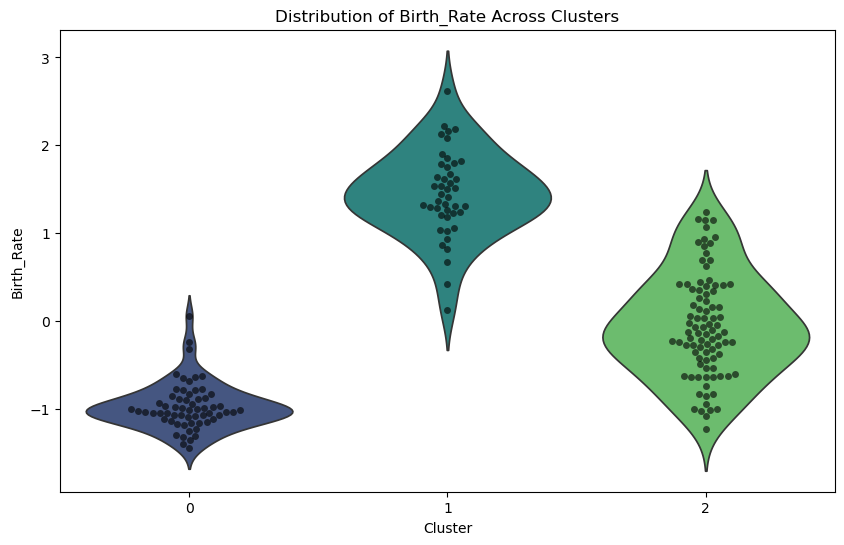

C:\Windows\Temp\ipykernel_16008\1282861973.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

47.5% of the points cannot be placed; you may want to decrease the size 

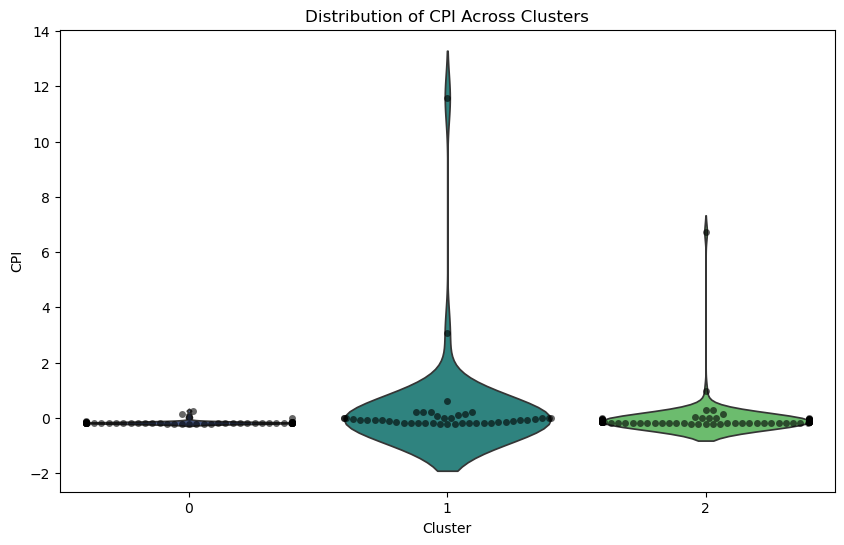

C:\Windows\Temp\ipykernel_16008\1282861973.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




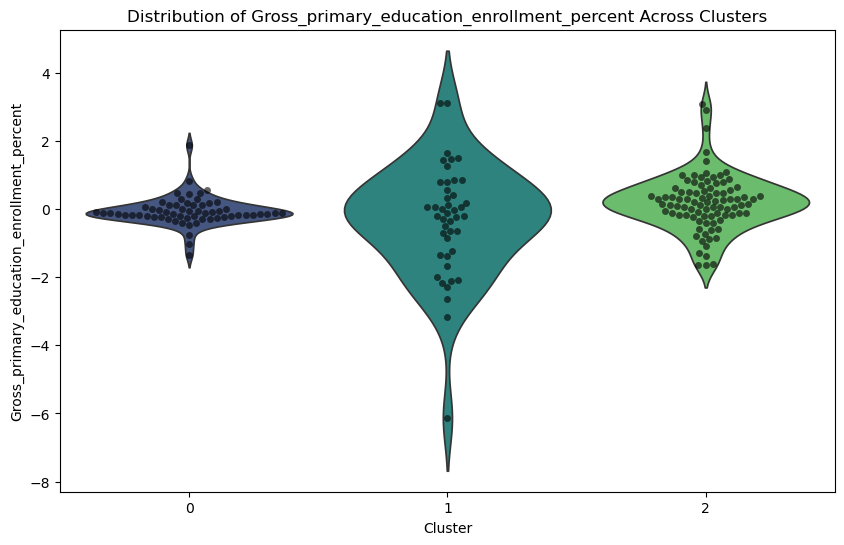

C:\Windows\Temp\ipykernel_16008\1282861973.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




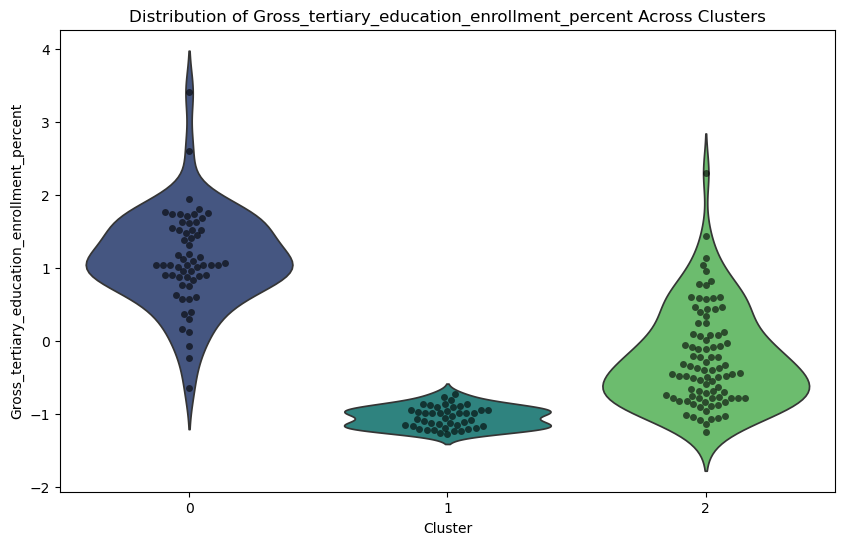

C:\Windows\Temp\ipykernel_16008\1282861973.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




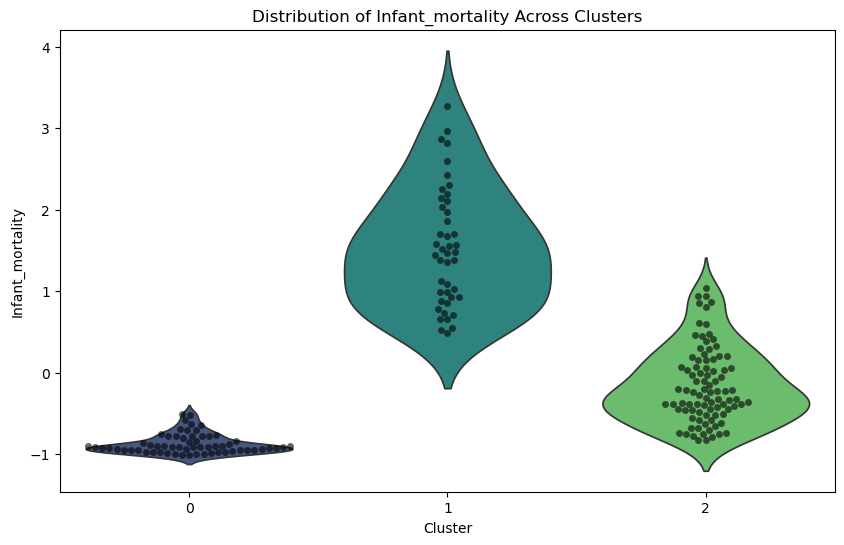

C:\Windows\Temp\ipykernel_16008\1282861973.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




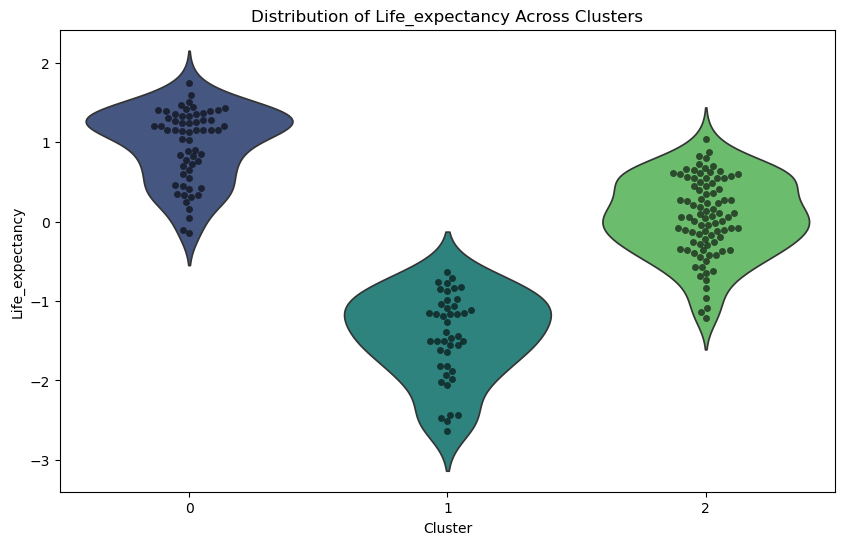

C:\Windows\Temp\ipykernel_16008\1282861973.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

42.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



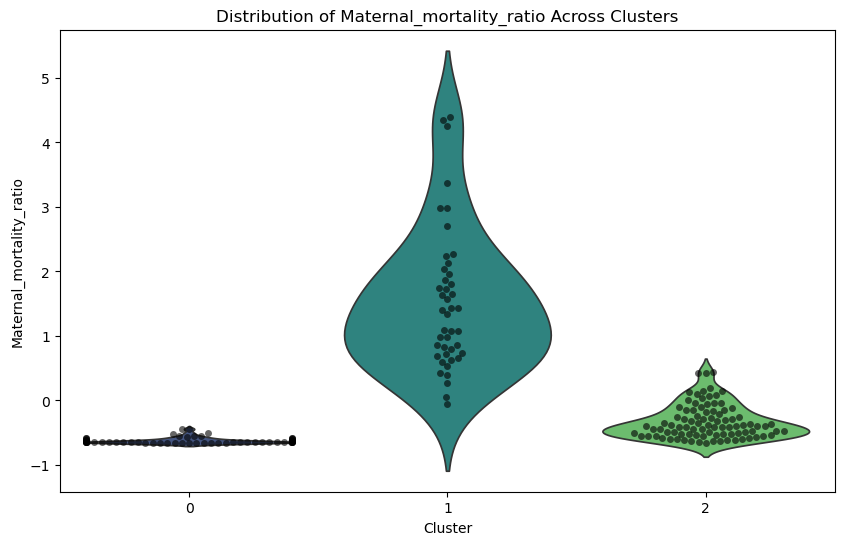

C:\Windows\Temp\ipykernel_16008\1282861973.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



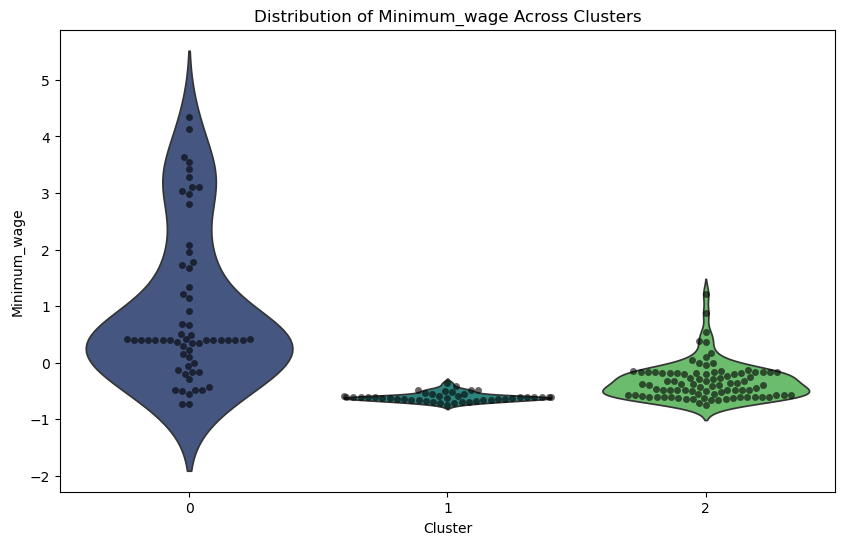

C:\Windows\Temp\ipykernel_16008\1282861973.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




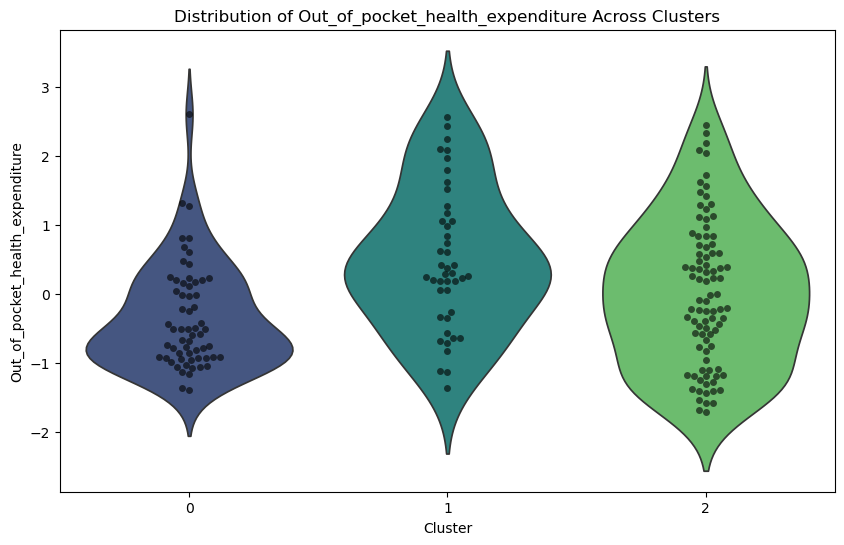

C:\Windows\Temp\ipykernel_16008\1282861973.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




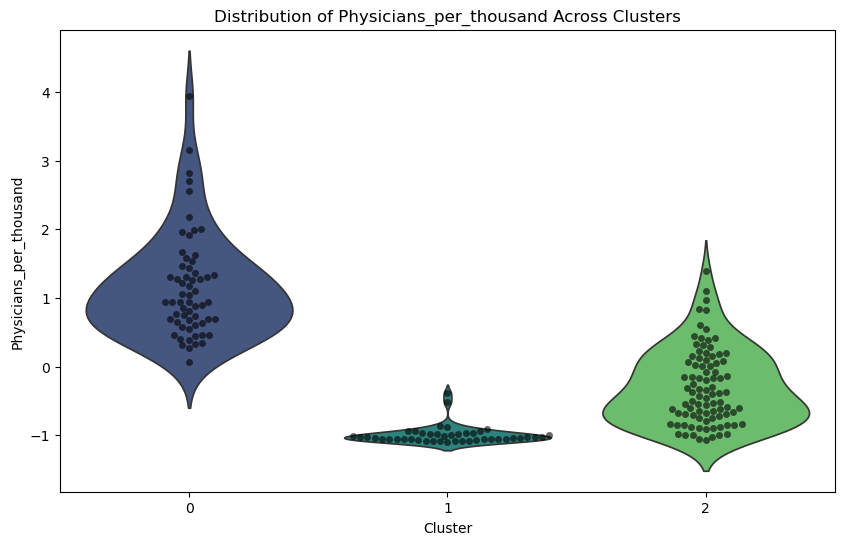

C:\Windows\Temp\ipykernel_16008\1282861973.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




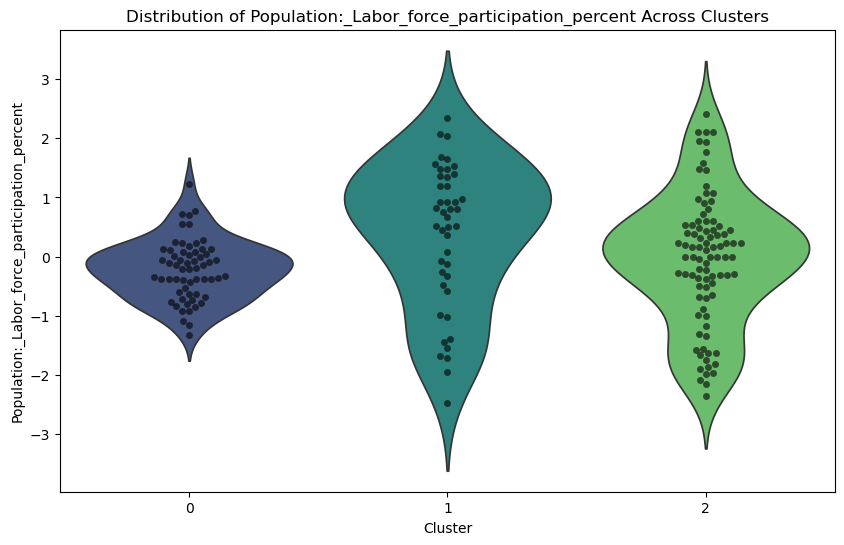

C:\Windows\Temp\ipykernel_16008\1282861973.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




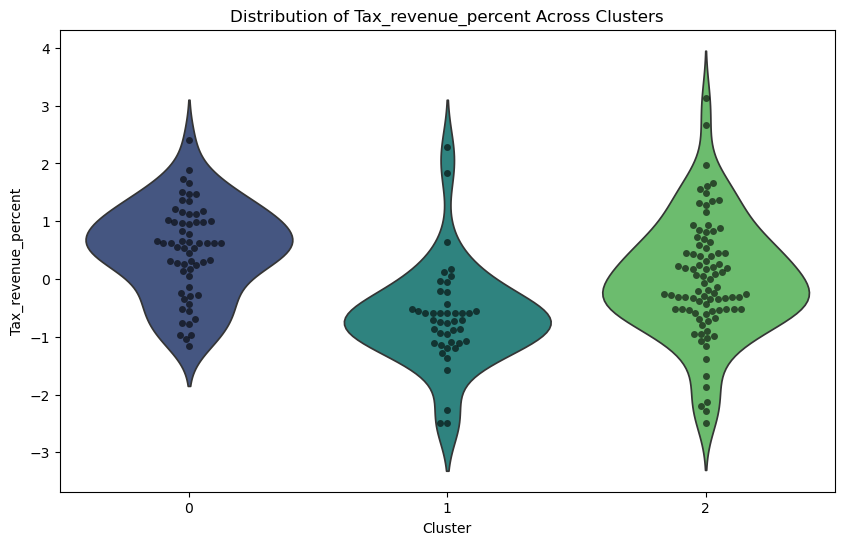

C:\Windows\Temp\ipykernel_16008\1282861973.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




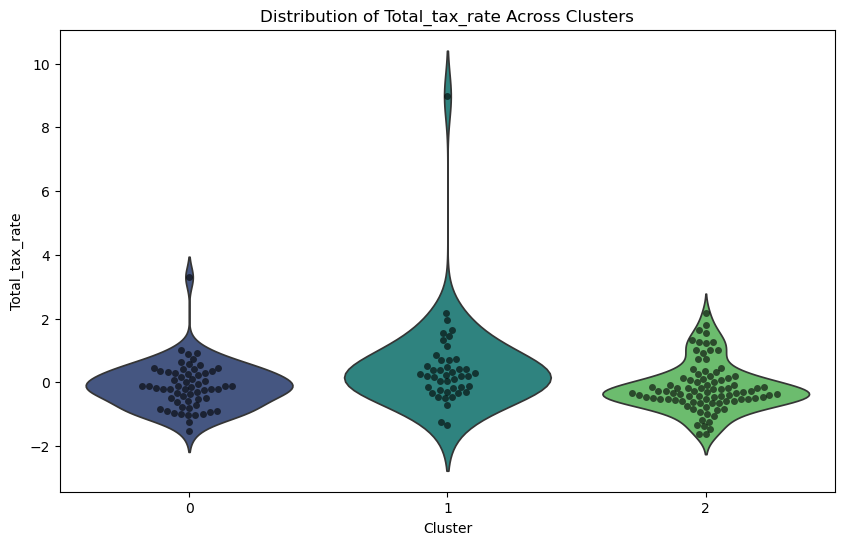

C:\Windows\Temp\ipykernel_16008\1282861973.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




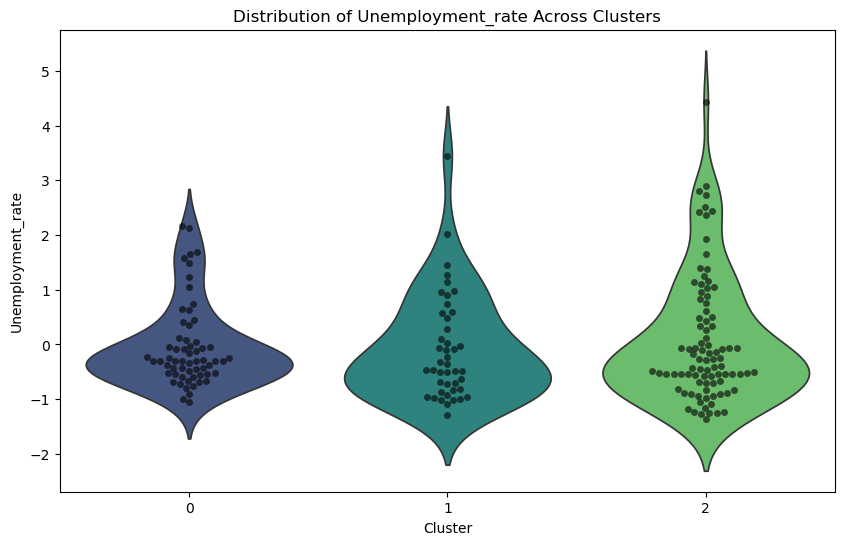

C:\Windows\Temp\ipykernel_16008\1282861973.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

24.6% of the points cannot be placed; you may want to decrease the size 

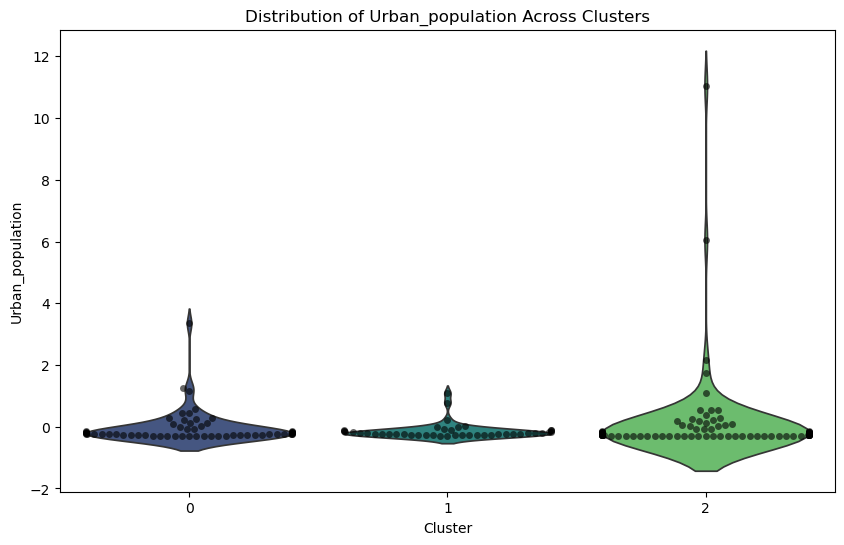

In [362]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through each feature and plot the combined violin and swarm plot
for feature in df_selected.columns:
    plt.figure(figsize=(10, 6))
    
    # Create the violin plot
    sns.violinplot(x='Cluster', y=feature, data=data_with_labels, palette='viridis', inner=None)  # inner=None to avoid duplicate plot of quartiles
    
    # Overlay the swarm plot on top of the violin plot
    sns.swarmplot(x='Cluster', y=feature, data=data_with_labels, color='k', alpha=0.6)  # 'k' for black dots

    plt.title(f'Distribution of {feature} Across Clusters')
    plt.savefig(fr'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\Clustering\distribution_{feature}.png')
    plt.show()



In [363]:
import pandas as pd
import plotly.express as px

# Load the original data
data_path = r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\data\cleaned_global_country_data.csv'
df_original = pd.read_csv(data_path)

# Ensure 'Country' is in the DataFrame (adjust this line if necessary)
if 'Country' not in df_original.columns:
    raise ValueError("'Country' column is missing from the DataFrame.")

# Add the cluster labels to the original data
df_original['Cluster'] = kmeans_labels  # Assuming 'kmeans_labels' contains your cluster labels

# Filter out non-numeric features if needed
numeric_features = df_original.select_dtypes(include=['float64', 'int64']).columns

# Define a color map for the clusters
cluster_color_map = {0: 'red', 1: 'green', 2: 'blue'}

# Create and save the bar plots for each feature
for feature in numeric_features:
    # Get the top 20 countries for this feature
    top_20 = df_original[['Country', feature, 'Cluster']].sort_values(by=feature, ascending=False).head(80)

    # Create a bar plot with cluster-based coloring
    fig = px.bar(top_20, x='Country', y=feature, color='Cluster',
                 color_discrete_map=cluster_color_map,
                 title=f'Top 20 Countries by {feature} (Colored by Cluster)',
                 labels={feature: f'{feature} Value'},
                 template='plotly_white')

    # Save the figure as an image
    fig.write_image(fr'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\Clustering\top_20_{feature}_by_cluster.png')

    # Optionally display the figure in the notebook
    fig.show()

    # Print the value counts for each cluster in the top 20 for this feature
    cluster_value_counts = top_20['Cluster'].value_counts().sort_index()
    print(f"\nValue Counts for {feature}:")
    print(cluster_value_counts)
    print("\n" + "-"*50 + "\n")



Value Counts for Density_P_Km2:
Cluster
0    28
1    12
2    40
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Agricultural_Land_percent:
Cluster
0    24
1    29
2    27
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Land_AreaKm2:
Cluster
0    19
1    28
2    33
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Armed_Forces_size:
Cluster
0    26
1    12
2    42
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Birth_Rate:
Cluster
0     1
1    44
2    35
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Calling_Code:
Cluster
0    28
1     2
2    50
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Co2_Emissions:
Cluster
0    41
1     3
2    36
Name: count, dtype: int64

--------------------------------------------------




Value Counts for CPI:
Cluster
0     8
1    29
2    43
Name: count, dtype: int64

--------------------------------------------------




Value Counts for CPI_Change_percent:
Cluster
0    15
1    27
2    38
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Fertility_Rate:
Cluster
0     1
1    44
2    35
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Forested_Area_percent:
Cluster
0    22
1    17
2    41
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Gasoline_Price:
Cluster
0    46
1    14
2    20
Name: count, dtype: int64

--------------------------------------------------




Value Counts for GDP:
Cluster
0    41
1     7
2    32
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Gross_primary_education_enrollment_percent:
Cluster
0    13
1    16
2    51
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Gross_tertiary_education_enrollment_percent:
Cluster
0    58
2    22
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Infant_mortality:
Cluster
1    44
2    36
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Life_expectancy:
Cluster
0    52
2    28
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Maternal_mortality_ratio:
Cluster
1    44
2    36
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Minimum_wage:
Cluster
0    52
2    28
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Out_of_pocket_health_expenditure:
Cluster
0    13
1    26
2    41
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Physicians_per_thousand:
Cluster
0    60
2    20
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Population:
Cluster
0    18
1    28
2    34
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Population:_Labor_force_participation_percent:
Cluster
0    11
1    28
2    41
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Tax_revenue_percent:
Cluster
0    43
1     3
2    34
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Total_tax_rate:
Cluster
0    24
1    29
2    27
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Unemployment_rate:
Cluster
0    23
1    19
2    38
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Urban_population:
Cluster
0    27
1    20
2    33
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Latitude:
Cluster
0    49
1     2
2    29
Name: count, dtype: int64

--------------------------------------------------




Value Counts for Longitude:
Cluster
0    13
1    18
2    49
Name: count, dtype: int64

--------------------------------------------------



In [365]:
import pandas as pd
import folium

# Load the original data with clusters from an Excel file
data_path = r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\data\data_with_clusters.xlsx'
df_original = pd.read_excel(data_path)

# Load the country mapping CSV file
mapping_path = r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\data\country_mapping.csv'
country_mapping = pd.read_csv(mapping_path)

# Create a dictionary to map encoded values back to country names
country_dict = dict(zip(country_mapping['Encoded_Value'], country_mapping['Unnamed: 0']))

# Remap the country codes in the df_original DataFrame
df_original['Country'] = df_original['Country'].map(country_dict)

# Define the geojson path
geojson_path = r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\data\modified_boundaries.geojson'

# Define a color map for the clusters
cluster_color_map = {0: 'red', 1: 'green', 2: 'blue'}

# Create a folium map
m = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodb positron")

# Function to apply the correct color based on the cluster
def get_color(cluster):
    return cluster_color_map.get(cluster, 'gray')  # Default to gray if cluster not found

# Add GeoJson layer with country coloring based on clusters
folium.GeoJson(
    geojson_path,
    style_function=lambda feature: {
        'fillColor': get_color(df_original.set_index('Country').loc[feature['properties']['name'], 'Cluster']) 
        if feature['properties']['name'] in df_original['Country'].values else 'lightgray',
        'color': 'black',
        'weight': 0.5,
        'dashArray': '5, 5'
    },
    tooltip=folium.GeoJsonTooltip(fields=['name'], aliases=['Country:'], labels=True, 
                                  style=("font-weight: bold; background-color: white; padding: 5px;"))
).add_to(m)

# Add Layer control
folium.LayerControl().add_to(m)

# Save the map as an interactive HTML file
m.save(r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\clusters_folium_map.html')

# Display the map in the notebook
m
